<a href="https://colab.research.google.com/github/archie46/Deep-Learning-Lab/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from tensorflow.keras import models, layers
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model,Sequential
import sklearn.metrics as sk_metrics
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cd /content/drive/MyDrive/AML6/

/content/drive/MyDrive/AML6


In [ ]:
ls

archive.zip  chest_xray/  Lab1.ipynb  Lab6.ipynb  ROC.png


In [ ]:
batch_size = None
img_height = 224
img_width = 224

In [ ]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='chest_xray/test',
    labels='inferred',
    label_mode='int',
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
vgg16 = VGG16()

In [ ]:
x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

In [ ]:
model1 = Model(vgg16.input,x)

In [ ]:
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model = Sequential()
model.add(model1)
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_4 (Functional)        (None, 2)                 134268738 
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
Total params: 134,268,738
Trainable params: 134,268,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
test_images = []
test_labels = []
i = 0
for images,labels in test_ds:
  test_images.append(images)
  test_labels.append(labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('\nTest accuracy:', test_acc)

20/20 [==============================] - 420s 20s/step - loss: 1.2310 - accuracy: 0.4295

Test accuracy: 0.4294871687889099


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

20/20 [==============================] - 404s 20s/step


In [ ]:
predictions[0]

array([0.6145806, 0.3854194], dtype=float32)

In [ ]:
np.max(predictions[0])

0.6145806

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
pred_score = []
pred_labels =[]
for i in range(len(predictions)):
  pred_score.append(np.max(predictions[i]))
  pred_labels.append(np.argmax(predictions[i]))
pred_score = np.array(pred_score)
pred_labels = np.array(pred_labels)

In [ ]:
cm = sk_metrics.confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[229   5]
 [351  39]]


In [ ]:
print("Sensitivity : ",cm[0][0]/(cm[0][0]+cm[1][0]))
print("Specifivity : ",cm[1][1]/(cm[1][1]+cm[0][1]))

Sensitivity :  0.39482758620689656
Specifivity :  0.8863636363636364


In [ ]:
print(sk_metrics.classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.39      0.98      0.56       234
           1       0.89      0.10      0.18       390

    accuracy                           0.43       624
   macro avg       0.64      0.54      0.37       624
weighted avg       0.70      0.43      0.32       624



In [ ]:
fpr, tpr, thresholds = sk_metrics.roc_curve(test_labels,pred_score)
sk_metrics.auc(fpr, tpr)

0.28914091606399295

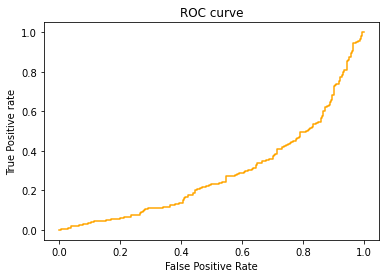

In [ ]:
plt.plot(fpr, tpr,color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.astype("uint8"), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

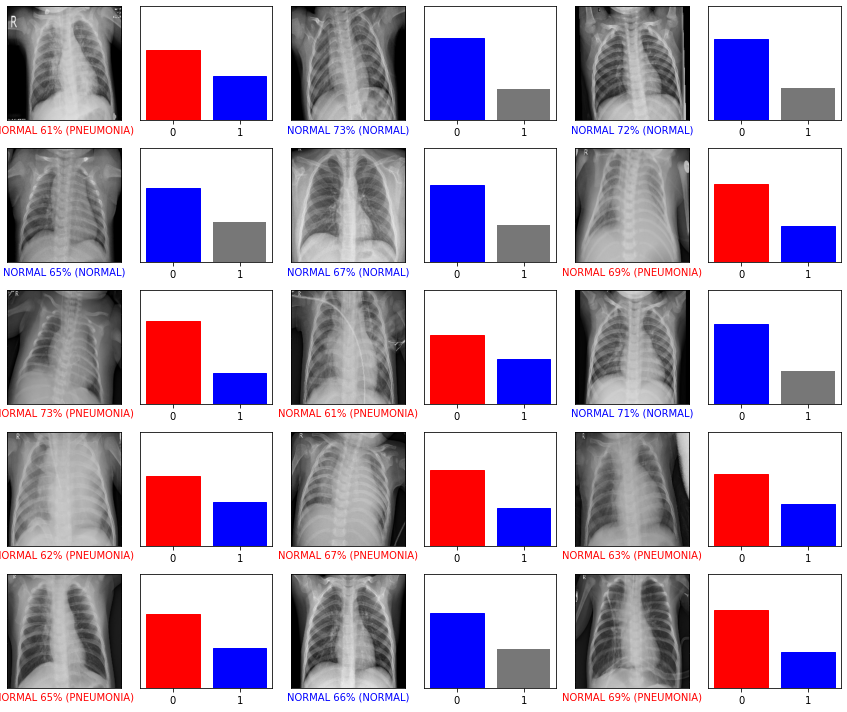

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()